# My pandas notebook

Notebook for my pandas studies. I'm currently reading the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html), and trying to learn this amazing python library!

![Panda](images/Panda.gif)

## Importing dependencies, and creating dataframes

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Df for What kind of data does pandas handle?
standard_df = pd.DataFrame(
    {
        "Name": [
            "Gabriel",
            "Ricardo",
            "Giovanna"
        ],
        "Age": [
            19,
            43,
            27
        ],
        "Sex": [
            'm',
            'm',
            'f'
        ]
    }
)

In [3]:
# Titanic df
titanic_df = pd.read_csv("data/titanic.csv")

In [4]:
# Air quality df
air_quality_df = pd.read_csv("data/air_quality.csv")

In [5]:
# Air quality no2 df
no2_df = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)

## What kind of data does pandas handle?

Doc [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented)

In [6]:
standard_df.head()

,Name,Age,Sex
0,Gabriel,19,m
1,Ricardo,43,m
2,Giovanna,27,f


In [7]:
# Getting the ages from my df
standard_ages_df = standard_df["Age"]

# Creating a series of ages
standard_ages_series = pd.Series([19, 43, 27], name="Age")

In [8]:
standard_ages_df.head()

0    19
1    43
2    27
Name: Age, dtype: int64

In [9]:
standard_ages_series.head()

0    19
1    43
2    27
Name: Age, dtype: int64

In [10]:
# Max age of my df
standard_df["Age"].max()

43

As illustrated by the max() method, you can do things with a DataFrame or Series. The max method for an example returns the maximum value of a Pandas Series (single column).

In [11]:
# Statistics of my df
standard_df.describe()

,Age
count,3.000000
mean,29.666667
std,12.220202
min,19.000000
25%,23.000000
50%,27.000000
75%,35.000000
max,43.000000


The describe method provides a quick overview of the numerical data in a DataFrame. As the Name and Sex columns are textual data, these are by default not taken into account by the describe method.

![Screenshot](images/Screenshot01.png)

## How do I read and write tabular data?

Docs [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/02_read_write.html)

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
# Check the column types
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The object columns here are basically an array of characters (string).

In [15]:
# General info about the df - really useful method
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Lets explain the ouput:

* It is indeed a DataFrame.
* There are 891 entries, i.e. 891 rows.
* Each row has a row label (aka the index) with values ranging from 0 to 890.
* The table has 12 columns. Most columns have a value for each of the rows (all 891 values are non-null). Some columns do have missing values and less than 891 non-null values.
* The columns Name, Sex, Cabin and Embarked consists of textual data (strings, aka object). The other columns are numerical data with some of them whole numbers (aka integer) and others are real numbers (aka float).
* The approximate amount of RAM used to hold the DataFrame is provided as well.

![Screenshot](images/Screenshot02.png)

## How do I select a subset of a Dataframe?

Docs [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html)

### How do I select specific columns from a DataFrame?

In [16]:
titanic_ages = titanic_df["Age"]
titanic_age_sex = titanic_df[["Age", "Sex"]]

In [17]:
# Number of columns and rows
titanic_ages.shape

(891,)

In [18]:
titanic_df.shape

(891, 12)

In [19]:
# We can verify the type of a Pandas Object using the built-in python method type
print(type(titanic_age_sex)) # DataFrame
print(type(titanic_ages)) # Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [20]:
print(titanic_ages.head(), end='\n\n')
print(titanic_age_sex.head())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

    Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male


### How do I filter data from a DataFrame?

In [21]:
# Using conditions
titanic_above_35 = titanic_df[titanic_df["Age"] > 35]
titanic_above_35.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


In [22]:
# Using Is in method
titanic_class_two_and_three = titanic_df[titanic_df["Pclass"].isin([2, 3])]
titanic_class_two_and_three.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


Similar to the conditional expression, the isin() conditional function returns a True for each row the values are in the provided list. To filter the rows based on such a function, use the conditional function inside the selection brackets [].

In [23]:
# Using logical operators
titanic_class_two_and_three = titanic_df[(titanic_df["Pclass"] == 2) | (titanic_df["Pclass"] == 3)]
titanic_class_two_and_three.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


When combining multiple conditional statements, each condition must be surrounded by parentheses (). Moreover, you can not use or/and but need to use the or operator | and the and operator &, just like we do for working with Python lists.

In [24]:
# Using notna
titanic_known_ages = titanic_df[titanic_df["Age"].notna()]
titanic_known_ages.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [25]:
# Getting name of adult passangers
titanic_adult_passangers = titanic_df.loc[titanic_df["Age"] >= 18, "Name"]
titanic_adult_passangers.head(10)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
6                               McCarthy, Mr. Timothy J
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
Name: Name, dtype: object

For that kind of filter, we need to use the loc (location) and iloc (integer location) operators. When using loc/iloc, the part before the comma is the rows you want, and the part after the comma is the columns you want to select.

In [26]:
type(titanic_adult_passangers)

pandas.core.series.Series

In [27]:
# Using iloc for getting data from specific rows/columns
titanic_df.iloc[9:25, 2:5] # Rows 10 to 25, Columns 3 to 5

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


In [28]:
# Changing the value of column name from the first three rows 
titanic_df.iloc[0:3, 3] = "anonymous"
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* loc: loc() is label based data selecting method which means that we have to pass the name of the row or column which we want to select. loc() can accept the boolean data unlike iloc().
* iloc: iloc() is a indexed based selecting method which means that we have to pass integer index in the method to select specific row/column.

Source [here](https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/)

![Screenshot](images/Screenshot03.png)

## How to create plots in Pandas?

Docs [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html#min-tut-04-plotting)

In [29]:
# We're gonna use the air_quality for this
air_quality_df.head(10)

,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN
5,2019-05-07 07:00:00,NaN,72.4,26.0
6,2019-05-07 08:00:00,NaN,77.7,32.0
7,2019-05-07 09:00:00,NaN,67.9,32.0
8,2019-05-07 10:00:00,NaN,56.0,28.0
9,2019-05-07 11:00:00,NaN,34.5,21.0


<AxesSubplot:>

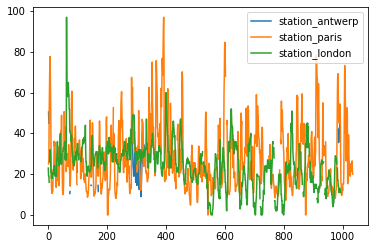

In [30]:
# Most simple plot you can make
air_quality_df.plot()

<AxesSubplot:>

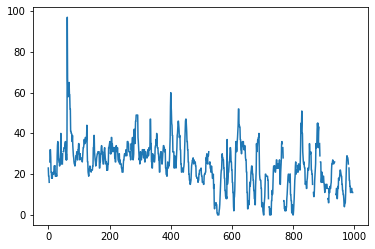

In [31]:
# We can also use Series to generate plots
air_quality_df["station_london"].plot()

In [32]:
# There are some different plots we can use for our graphs
[method_name for method_name in dir(air_quality_df.plot) if not method_name.startswith('_')]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot:>

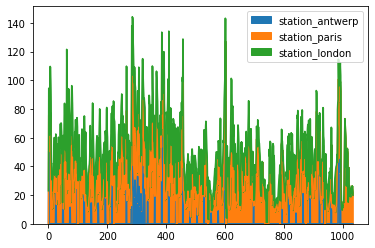

In [33]:
air_quality_df.plot.area()

<AxesSubplot:>

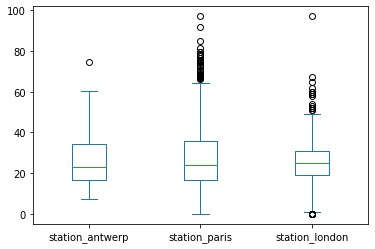

In [34]:
air_quality_df.plot.box()

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

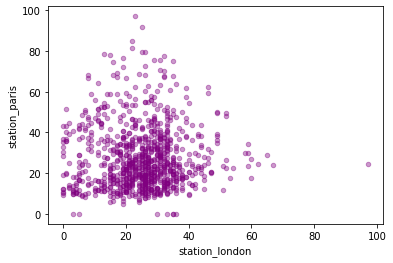

In [35]:
# Comparing the NO2 values measured in London and Paris
air_quality_df.plot.scatter(x="station_london", y="station_paris", c='purple', alpha=0.4)

Explaining the arguments to scatter:

* x: x axis (data position)
* y: y axis (data position)
* c: color
* alpha: transparency of the graph data

### Saving figures and subplots

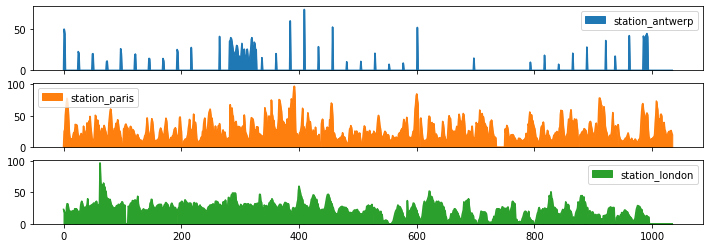

In [36]:
# Working with subsplots
air_quality_axs = air_quality_df.plot.area(figsize=(12, 4), subplots=True)

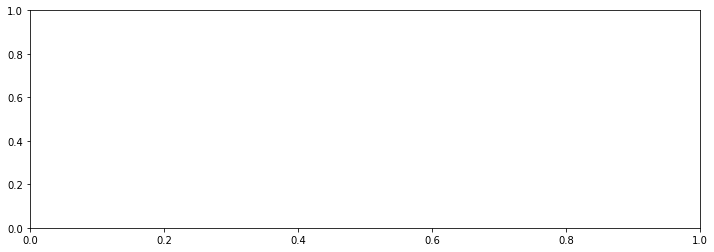

In [37]:
# Create an empty matplotlib Figure and Axes
air_quality_fig, air_quality_axs = plt.subplots(figsize=(12, 4))

In [38]:
# Use pandas to put the area plot on the prepared Figure/Axes
air_quality_df.plot.area(ax=air_quality_axs)

<AxesSubplot:>

In [39]:
# Do any matplotlib customization you like - in this case, adds a label to the figure
air_quality_axs.set_ylabel("NO$_2$ concentration")

Text(3.200000000000017, 0.5, 'NO$_2$ concentration')

In [40]:
# Save the Figure/Axes using the existing matplotlib method
air_quality_fig.savefig("images/No2_concentrations.png")

![Screenshot](images/Screenshot04.png)

## How to create new columns derived from existing columns?

Docs [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/05_add_columns.html)

In [41]:
no2_df.head(10)

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
2019-05-07 07:00:00,NaN,72.4,26.0
2019-05-07 08:00:00,NaN,77.7,32.0
2019-05-07 09:00:00,NaN,67.9,32.0
2019-05-07 10:00:00,NaN,56.0,28.0


To create a new column, use the [] brackets with the new column name at the left side of the assignment:

In [42]:
# Performing mathematical operations
no2_df["london_mg_per_cubic"] = no2_df["station_london"] * 1.882
no2_df.head(5)

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [43]:
no2_df["ratio_paris_antwerp"] = (
    no2_df["station_paris"] / no2_df["station_antwerp"]
)
no2_df.head(5)

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [44]:
# Renaming columns
no2_renamed_df = no2_df.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)
no2_renamed_df.head(10)

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
2019-05-07 07:00:00,NaN,72.4,26.0,48.932,NaN
2019-05-07 08:00:00,NaN,77.7,32.0,60.224,NaN
2019-05-07 09:00:00,NaN,67.9,32.0,60.224,NaN
2019-05-07 10:00:00,NaN,56.0,28.0,52.696,NaN


In [45]:
no2_renamed_df = no2_renamed_df.rename(columns=str.lower)
no2_renamed_df.head(5)

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


![Screenshot](images/Screenshot05.png)

## How to calculate summary statistics?

Docs [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)

In [46]:
# Using the mean method for calculating the average age of titanic passangers
titanic_df["Age"].mean()

29.69911764705882

In [47]:
# Using the median method for calculating the median for age and ticket fare price
titanic_df[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

Remember about the describe method? We can also specify what statistics we want to see, using the agg method:

In [48]:
titanic_df[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [49]:
titanic_df.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"]
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208
